In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from decimal import Decimal
import random

In [2]:
def function_N():
    A = np.array([[4, 3],[1, 9]])
    B = np.array([[5, 15],[20, 5]])
    C = A[0,0]-A[1,0]-A[0,1]+A[1,1]
    Alpha = A[1,1]-A[0,1]
    D = B[0,0]-B[1,0]-B[0,1]+B[1,1]
    Beta = B[1,1]-B[1,0]
    q = round(Alpha / C, 4)
    p = round(Beta / D, 4)
    p_strategy = np.array([[p, 1-p]])
    q_starategy = np.array([[q, 1-q]])

    f1 = np.dot(np.dot(p_strategy, A), q_starategy.T)
    f2 = np.dot(np.dot(p_strategy, B), q_starategy.T)
    return p, q, f1, f2

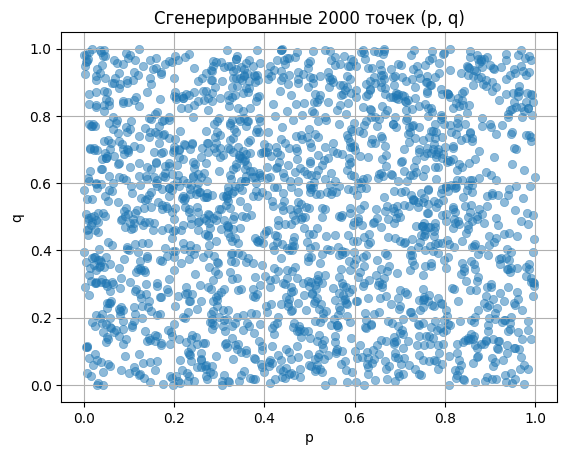

In [3]:
# Установим размер массивов
n = 2000

# Сгенерируем массивы случайных чисел
p_values = np.random.rand(n)
q_values = np.random.rand(n)

# Построим график
plt.scatter(p_values, q_values, alpha=0.5, linewidth=0.5)
plt.title('Сгенерированные 2000 точек (p, q)')
plt.xlabel('p')
plt.ylabel('q')
plt.grid(True)
plt.show()


In [4]:
p_n, q_n, f1_n, f2_n = function_N()
print(f'p* = [{p_n}, {1-p_n}]')
print(f'q* = [{q_n}, {1-q_n}]')
print(f'\nГарантированное решение:\tf1 = {round(f1_n[0][0], 2)},\tf2 = {f2_n[0][0]}')

p* = [0.6, 0.4]
q* = [0.6667, 0.33330000000000004]

Гарантированное решение:	f1 = 3.67,	f2 = 11.0


In [5]:
A = [[4,3],[1,9]]
B = [[5,15],[20,5]]

C = A[0][0] - A[1][0] - A[0][1] + A[1][1]
alpha = A[1][1] - A[0][1]
D = B[0][0] - B[1][0] - B[0][1] + B[1][1]
beta = B[1][1] - B[1][0]

point1 = Fraction(Decimal(alpha)/Decimal(C)).limit_denominator()
point2 = Fraction(Decimal(beta)/Decimal(D)).limit_denominator()

Максимальное значение f1 = 4.98030204348912,
Максимальное значение f2 = 12.296484022562197

Максимальное значение N = 2.5922265771984785
p = 0.0457113252917517,	q = 0.49356020295703196


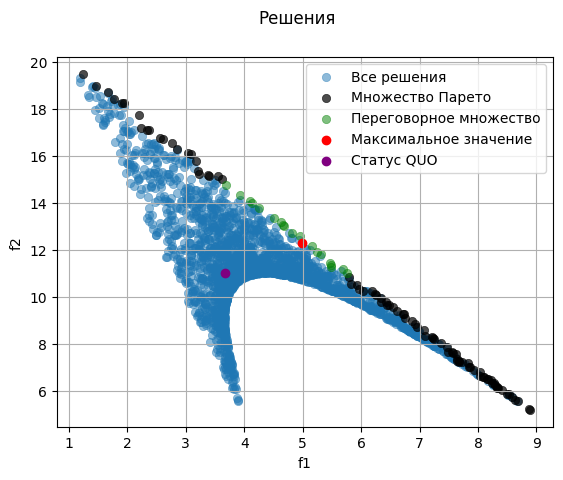

In [6]:
class Point:
    def __init__(self, x, y, p, q):
        self.x = x
        self.y = y
        self.p = p
        self.q = q
        self.optimal = None
        self.slater = None
        self.nash = ((9 * p * q -8 * q - 6 * p + 9) - 11/3) * ((5 * p * q + 10 * p + 15 * q + 5) - 11)

def exclude_unoptimal(points):
    for i in points:
        if i.optimal == False:
            continue
        for j in points:
            if j == i:
                continue
            if i.x <= j.x and i.y <= j.y:
                i.optimal = False
                break
    for i in points:
        if i.optimal == None:
            i.optimal = True

def slater(points, x, y):
    for i in points:
        if i.x <= x or i.y <= y:
            i.slater = False
        else:
            i.slater = True

def getPoint(p,q):
    f1 = np.array([p,1-p]) @ A @ np.array([[q],[1-q]])
    f2 = np.array([p,1-p]) @ B @ np.array([[q],[1-q]])
    return Point(f1[0],f2[0],p,q)

points = []

for i in range(2000):
    x = random.uniform(0,1)
    y = random.uniform(0,1)
    points.append(getPoint(x,y))



exclude_unoptimal(points)
nash = getPoint(point2,point1)
slater(points,nash.x,nash.y)

opt = [point for point in points if point.optimal == True and point.slater == False]
slater = [point for point in points if point.slater == True and point.optimal == True]
unopt = [point for point in points if point.optimal == False]

unopt_x = [point.x for point in unopt]
unopt_y = [point.y for point in unopt]

max_nash = max(slater, key = lambda x: x.nash)
print(f'Максимальное значение f1 = {max_nash.x},\nМаксимальное значение f2 = {max_nash.y}')
print(f'\nМаксимальное значение N = {max_nash.nash}')
print(f'p = {max_nash.p},\tq = {max_nash.q}')

# Все точки (синего цвета)
plt.scatter(unopt_x, unopt_y, alpha=0.5, linewidth=0.5, label='Все решения')
plt.scatter([point.x for point in opt], [point.y for point in opt], color="black", alpha=0.7, linewidth=0.5, label='Множество Парето')
plt.scatter([point.x for point in slater], [point.y for point in slater], color='green', alpha=0.5, linewidth=0.5, label='Переговорное множество')
plt.scatter(max_nash.x, max_nash.y, color='red', label='Максимальное значение')
plt.scatter(nash.x, nash.y, color='purple', label='Статус QUO')

plt.suptitle('Решения')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.grid(True)
plt.show()


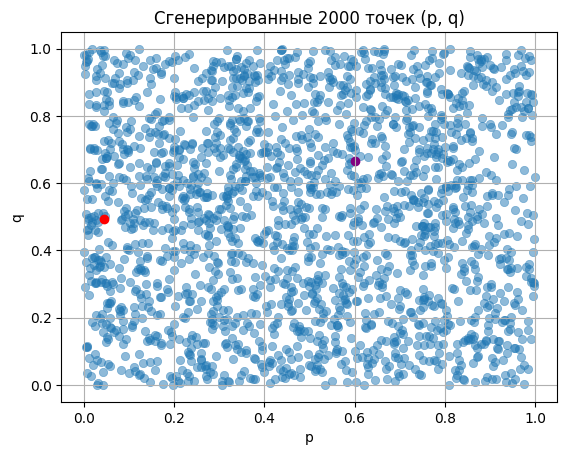

In [7]:
plt.scatter(p_values, q_values, alpha=0.5, linewidth=0.5)
plt.scatter(max_nash.p, max_nash.q, color='red', label='Максимальное значение')
plt.scatter(nash.p, nash.q, color='purple', label='Статус QUO')
plt.title('Сгенерированные 2000 точек (p, q)')
plt.xlabel('p')
plt.ylabel('q')
plt.grid(True)
plt.show()


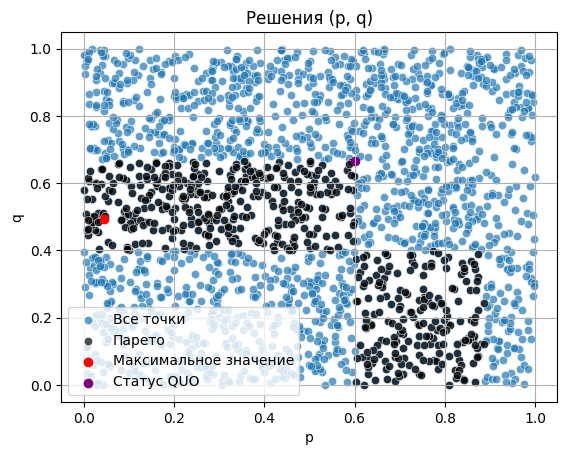

In [8]:
def f_1(p, q):
    A = np.array([[4, 3], [1, 9]])
    pq_vec = np.array([[p], [1 - p]])
    q_vec = np.array([q, 1 - q])
    result = np.dot(np.dot(pq_vec.T, A), q_vec)
    return result[0]

def f_2(p, q):
    B = np.array([[5, 15], [20, 5]])
    pq_vec = np.array([[p], [1 - p]])
    q_vec = np.array([q, 1 - q])
    result = np.dot(np.dot(pq_vec.T, B), q_vec)
    return result[0]

valid_p = []
valid_q = []

# Проверим каждую пару (p, q) на выполнение условий
for i in range(n):
    if f_1(p_values[i], q_values[i]) >= 11/3 and f_2(p_values[i], q_values[i]) >= 11:
        valid_p.append(p_values[i])
        valid_q.append(q_values[i])

# Построим график всех точек (p, q)
plt.scatter(p_values, q_values, alpha=0.7, edgecolors='w', linewidth=0.5, label='Все точки')
plt.scatter(valid_p, valid_q, color='black', alpha=0.7, edgecolors='w', linewidth=0.5, label='Парето')
plt.scatter(max_nash.p, max_nash.q, color='red', label='Максимальное значение')
plt.scatter(nash.p, nash.q, color='purple', label='Статус QUO')
plt.title('Решения (p, q)')
plt.xlabel('p')
plt.ylabel('q')
plt.legend()
plt.grid(True)
plt.show()

Имитационная модель

Первый игрок


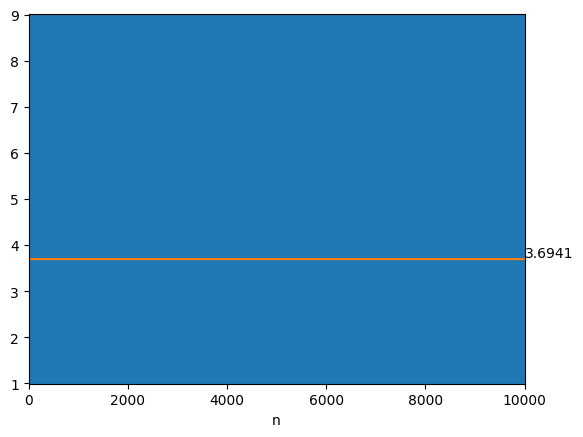

Эксперимент 2: p*, q1 = 0.5, q2= 0.5


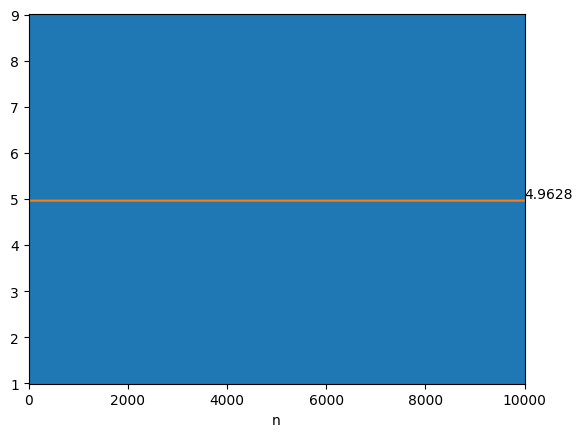

In [9]:
def model(p, q, a, cnt, summ):
    pStrat = random.uniform(0, 1)
    qStrat = random.uniform(0, 1)
    choiceP = 0
    choiceQ = 0
    if (pStrat > p[0]):
        #print('2', end='\t\t\t')
        choiceP = 1
    #else:
        #print('1', end='\t\t\t')
    if (qStrat > q[0]):
        choiceQ = 1
    #else:
        #print('1', end='\t\t\t')
    choice = a[choiceP][choiceQ]
    summ += choice
    #print(choice)
    return choice, summ


def draw_model(q, p, a, cnt):
    summ = 0
    #print('Номер итерации  \t Стратегия игрока 1 \t Стратегия игрока 2 \t Выбранный эл-т')
    x = [i + 1 for i in range(cnt)]
    y = []
    for i in range(cnt):
        res, summ = model(q, p, a, i + 1, summ)
        y.append(res)
    figure, axes = plt.subplots()
    axes.set_xlim(xmin=0, xmax=cnt)
    axes.set_ylim(ymin=min(y) - 0.01, ymax=max(y) + 0.01)
    axes.grid(which='major', color='#CCCCCC', linestyle='--')
    axes.grid(which='minor', color='#CCCCCC', linestyle=':')
    v = summ / cnt
    v = [v for i in range(cnt)]
    plt.xlabel('n')
    plt.plot(x, y)
    plt.plot(x, v)
    plt.text(cnt, summ / cnt + 0.05, summ / cnt, zorder=0)
    # print(summ / cnt)
    return plt


def imitation_model(p_res, q_res, df):
    cnt = 10000
    plot = draw_model(p_res, np.array([0.667, 0.333]), df, cnt)
    plot.show()
    print(f"Эксперимент 2: p*, q1 = 0.5, q2= 0.5")
    plot = draw_model(np.array([0.06, 0.94]), np.array([0.5, 0.5]), df, cnt)
    plot.show()


print('Первый игрок')
imitation_model(np.array([[2/ 5], [3 / 5]]), np.array([[1 / 3], [2 / 3]]), np.array(A))


Второй игрок


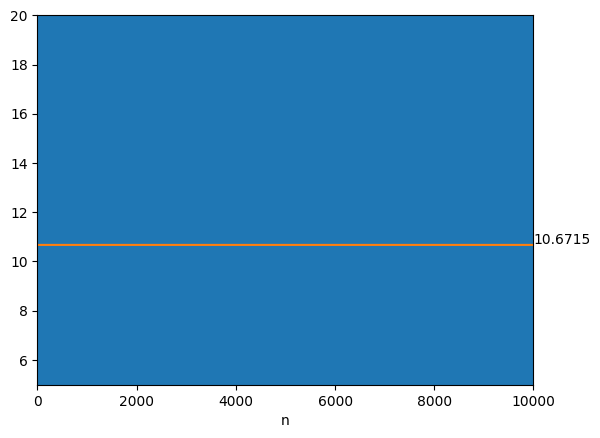

Эксперимент 2: p1 = 0.5, p2 = 0.5, q*


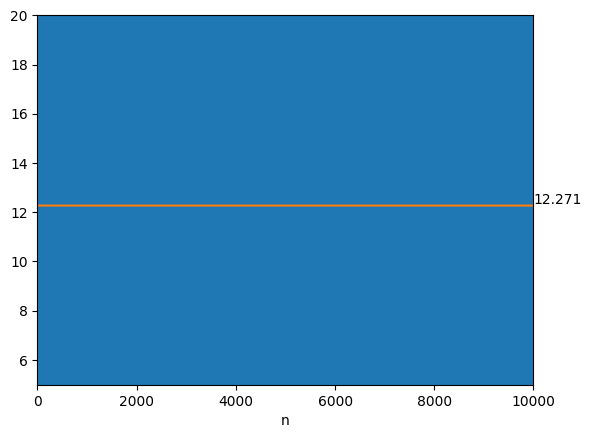

In [10]:
def imitation_model(p_res, q_res, df):
    cnt = 10000
    plot = draw_model(p_res, q_res, df, cnt)
    plot.show()
    print(f"Эксперимент 2: p1 = 0.5, p2 = 0.5, q*")
    plot = draw_model(np.array([0.06, 0.94]), np.array([0.5, 0.5]), df, cnt)
    plot.show()


print('Второй игрок')
imitation_model(np.array([[2 / 5], [3 / 5]]), np.array([[1 / 3], [2 / 3]]), np.array(B))
